###### Exercise in Photogrammetry I
## **Ex.6 : Matching**
### Hand out: xx.xx.xxxx
### Submission: xx.xx.xxxx
### Points: 15

## A. Cross Correlation

We have given an image ```I``` of an text. We would like to find all the locations of the letter 'a' in this text.

**Tasks:**
1. Load the image ```'images/text.png'``` as an grayscale image and visualize it. Convert it for further computations to float values. (1 Point)
2. Extract the letter 'a' from the image at ```I(13:22,66:75)```. The resulting patch should be of size *(9x9)*. Visualize it and print out the shape. (1 Point)
3. Write a function ```imageCorrelation(image,patch)``` which computes the correlation between an image and a patch. Compute the correlation values only for the pixels where the neighborhood is well defined.
**Hint:** You can modify the function ```imageConv(...)``` from the last exercise for this. The kernel must not be flipped for the correlation. You have to normalize the kernel and the neighborhood so that both are standard normal distributed: $N_{ij} \in N(0,1), w_{ij}\in N(0,1)$. (5 Points)
4. Compute the correlation for the given image and the extracted patch. Visualize the result. (1 Point)
5. Search and mark the maxima in the correlation image. A maxima is each pixel over 80% of the global maxima. (2 Points)
6. Why are only 3 of 5 a's detected. Write your answer in a markdown cell. (1 Points)
7. How can you also detect the other 2 a's. Implement your idea and show that you can find all a's. (4 Points)

In [17]:
# import all required modules
%matplotlib inline
import skimage.io
from skimage import io, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import math

[]

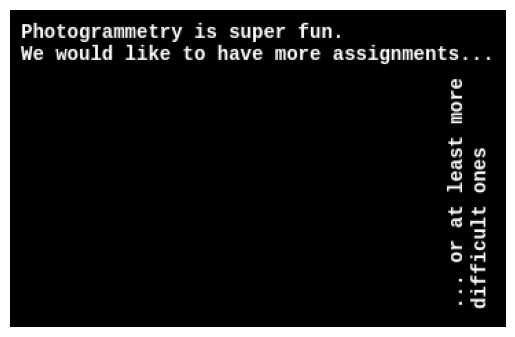

In [9]:
image_text = io.imread('images/text.png', as_gray=True)

plt.imshow(image_text, cmap='gray')
plt.axis('off')
plt.plot()

(9, 9)


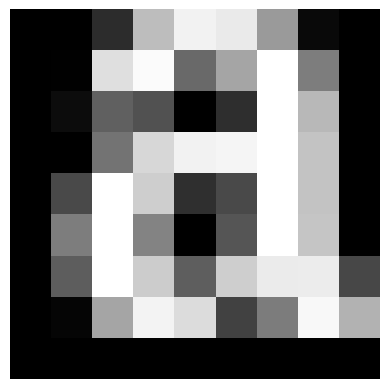

In [12]:
extracted_patch = image_text[13:22, 66:75]
plt.imshow(extracted_patch, cmap='gray')
plt.axis('off')
plt.plot()
print(extracted_patch.shape)

In [18]:
def imageCorrelation(image: np.ndarray, patch: np.ndarray) -> np.ndarray:
    
    '''
    Performs normalized cross correlation. 

    Parameters:
    - image (np.ndarray): Given 2D MxN image.
    - pattern (np.ndarray): 2D pattern to match in the image.

    Returns:
    - np.ndarray: Map with shape of input image, with correlation values.
    '''

    # Allocate return map.
    correlation_map = np.zeros(image.shape)

    # Normalize input.
    mean_image = np.mean(image)
    std_dev_image = np.std(image)
    mean_pattern = np.mean(patch)
    std_dev_pattern = np.std(patch)

    image_normalized = (image - mean_image) / std_dev_image
    pattern_normalized = (patch - mean_pattern) / std_dev_pattern

    # Perform cross-correlation at every pixel, filling the correlation map with values.
    # https://www.youtube.com/watch?v=5YAA7vS6kVU&t=1s 18:19.
    # Cross Correlation Function.
    for u in range(image.shape[0]):
        for v in range(image.shape[1]):
            correlation_map[u, v] = find_cross_correlation_value(image_normalized, pattern_normalized, u, v)

    return correlation_map

def find_cross_correlation_value(image: np.ndarray, pattern: np.ndarray, offset_u: int, offset_v: int) -> float:
    '''
    Calculates cross-corelation value at a given offset.

    Parameters:
    - image (np.ndarray): Given 2D MxN image.
    - pattern (np.ndarray): 2D pattern to match in the image.
    - offset_u (int): Row offset.
    - offset_v (int): Column offset.

    Returns:
    - int: Cross correlation value at given offset.
    '''
    # Get the overlapping patch from original image.
    # Do not go over image.
    max_u = min(image.shape[0] - 1, offset_u + pattern.shape[0] - 1) + 1
    max_v = min(image.shape[1] - 1, offset_v + pattern.shape[1] - 1) + 1
    overlapping_patch = image[offset_u : max_u, offset_v : max_v]

    # Covariance of g1 and g2 (numerator).
    covariance = 0

    # Find parameters independent of specific pixel.
    pattern_mean = mean(pattern)
    overlapping_patch_mean = mean(overlapping_patch)
    
    # Only the matching shape.
    if overlapping_patch.shape == pattern.shape:    
        for i in range(overlapping_patch.shape[0]):
            for j in range(overlapping_patch.shape[1]):
                covariance += (pattern[i, j] - pattern_mean) * (overlapping_patch[i, j] - mean(overlapping_patch))

        covariance /= overlapping_patch.size - 1

        # Calculate the denominator.
    
        # Standard deviation of the template.
        pattern_standard_deviation = standard_deviation(pattern, pattern_mean)
        overlapping_patch_standard_deviation = standard_deviation(overlapping_patch, overlapping_patch_mean)

        # Normalized Cross Correlation.
        # https://www.youtube.com/watch?v=5YAA7vS6kVU&t=1s 23:39

        numerator = covariance
        denominator = pattern_standard_deviation * overlapping_patch_standard_deviation

        if numerator == 0.0 or denominator == 0.0:
            return 0.0
    
        return covariance / denominator
        
    else:
        return 0.0

def mean(image : np.ndarray) -> float:
    '''
    Finds the mean intensity value of given image.

    Parameters:
    - image (np.ndarray): Given image.

    Returns:
    - float: Mean intensity value of a given image.
    '''

    mean = 0.0

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            mean += image[i, j]

    return mean / image.size

def standard_deviation(image: np.ndarray, mean: float) -> float:
    '''
    Calculates standard deviation of an image.

    Parameters:
    - image (np.ndarray): Given image.
    - mean (float): Precalculated mean of that image.

    Returns:
    - float: Standard deviation.
    '''

    standard_dev = 0
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            standard_dev += (image[i, j] - mean) ** 2

    standard_dev /= image.size - 1

    return math.sqrt(standard_dev)

In [19]:
correlation = imageCorrelation(image_text, extracted_patch)

In [43]:
np.set_printoptions(precision=3)
best_matches = np.argwhere(correlation > 0.8)
best_matches_values = correlation[best_matches[:, 0], best_matches[:, 1]]
for i in range(len(best_matches_values)):
    print(f'value: {best_matches_values[i]} at {best_matches[i]}')

value: 0.9999999999999993 at [13 66]
value: 0.8447663018470637 at [ 29 158]
value: 0.8217773319556032 at [ 29 159]
value: 0.9999999999999993 at [ 29 234]


[]

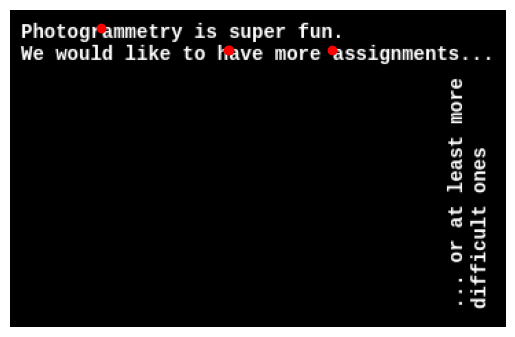

In [39]:
plt.imshow(image_text, cmap='gray')
y_coords, x_coords = zip(*best_matches)
plt.scatter(x_coords, y_coords, color='red')
plt.axis('off')
plt.plot()

## We didn't find another 2 a's, because they are rotated. We need to add additional loop over rotations of the kernel to find those 2 a's.

In [62]:
from scipy.ndimage import rotate

def imageCorrelation_rot(image: np.ndarray, patch: np.ndarray) -> np.ndarray:
    
    '''
    Performs normalized cross correlation, using rotations. 

    Parameters:
    - image (np.ndarray): Given 2D MxN image.
    - pattern (np.ndarray): 2D pattern to match in the image.

    Returns:
    - np.ndarray: Map with shape of input image, with correlation values.
    '''

    # Allocate return map.
    correlation_map = np.zeros(image.shape)

    # Normalize input.
    mean_image = np.mean(image)
    std_dev_image = np.std(image)
    mean_pattern = np.mean(patch)
    std_dev_pattern = np.std(patch)

    image_normalized = (image - mean_image) / std_dev_image
    pattern_normalized = (patch - mean_pattern) / std_dev_pattern

    # Perform cross-correlation at every pixel, filling the correlation map with values.
    # https://www.youtube.com/watch?v=5YAA7vS6kVU&t=1s 18:19.
    # Cross Correlation Function.
    for u in range(image.shape[0]):
        for v in range(image.shape[1]):
            correlation_map[u, v] = find_cross_correlation_value_rot(image_normalized, pattern_normalized, u, v)

    return correlation_map

def find_cross_correlation_value_rot(image: np.ndarray, pattern: np.ndarray, offset_u: int, offset_v: int) -> float:
    '''
    Calculates cross-corelation value at a given offset, rotating the kernel.

    Parameters:
    - image (np.ndarray): Given 2D MxN image.
    - pattern (np.ndarray): 2D pattern to match in the image.
    - offset_u (int): Row offset.
    - offset_v (int): Column offset.

    Returns:
    - int: Cross correlation value at given offset.
    '''

    # Keep updating the best match on each rotation.
    best_match = 0

    # Get the overlapping patch from original image.
    # Do not go over image.
    max_u = min(image.shape[0] - 1, offset_u + pattern.shape[0] - 1) + 1
    max_v = min(image.shape[1] - 1, offset_v + pattern.shape[1] - 1) + 1
    overlapping_patch = image[offset_u : max_u, offset_v : max_v]

    for angle in range(0, 360, 90):

        pattern_rot = rotate(pattern, angle, reshape=False)
        
        # Covariance of g1 and g2 (numerator).
        covariance = 0
    
        # Find parameters independent of specific pixel.
        pattern_mean = mean(pattern_rot)
        overlapping_patch_mean = mean(overlapping_patch)
        
        # Only the matching shape.
        if overlapping_patch.shape == pattern_rot.shape:    
            for i in range(overlapping_patch.shape[0]):
                for j in range(overlapping_patch.shape[1]):
                    covariance += (pattern_rot[i, j] - pattern_mean) * (overlapping_patch[i, j] - mean(overlapping_patch))
    
            covariance /= overlapping_patch.size - 1
    
            # Calculate the denominator.
        
            # Standard deviation of the template.
            pattern_standard_deviation = standard_deviation(pattern_rot, pattern_mean)
            overlapping_patch_standard_deviation = standard_deviation(overlapping_patch, overlapping_patch_mean)
    
            # Normalized Cross Correlation.
            # https://www.youtube.com/watch?v=5YAA7vS6kVU&t=1s 23:39
    
            numerator = covariance
            denominator = pattern_standard_deviation * overlapping_patch_standard_deviation
    
            if numerator == 0.0 or denominator == 0.0:
                continue

            if (covariance / denominator) > best_match:
                best_match = (covariance / denominator)
            
        else:
            continue 

    return best_match

In [63]:
correlation_rot = imageCorrelation_rot(image_text, extracted_patch)

value: 0.9999999999999994 at [13 66]
value: 0.8447663018470636 at [ 29 158]
value: 0.821777331955603 at [ 29 159]
value: 0.9999999999999994 at [ 29 234]
value: 0.9993070740635208 at [109 321]
value: 0.9999832310891609 at [151 321]


[]

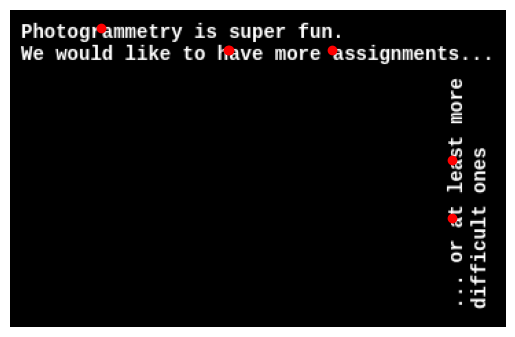

In [64]:
best_matches_rot = np.argwhere(correlation_rot > 0.8)
best_matches_values_rot = correlation_rot[best_matches_rot[:, 0], best_matches_rot[:, 1]]
for i in range(len(best_matches_values_rot)):
    print(f'value: {best_matches_values_rot[i]} at {best_matches_rot[i]}')

plt.imshow(image_text, cmap='gray')
y_coords, x_coords = zip(*best_matches_rot)
plt.scatter(x_coords, y_coords, color='red')
plt.axis('off')
plt.plot()

## Found them!